In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings('ignore')

In [88]:
df=pd.read_csv("./data/titanic_toy.csv")
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [90]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [91]:
X=df.drop("Survived",axis=1)
y=df['Survived']

In [92]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [93]:
X_train.shape,X_test.shape

((712, 3), (179, 3))

In [94]:
X_train.isnull().mean()*100

Age       19.662921
Fare       5.056180
Family     0.000000
dtype: float64

In [95]:
mean_Age=X_train['Age'].mean()
median_Age=X_train['Age'].median()

mean_Fare=X_train['Fare'].mean()
median_Fare=X_train['Fare'].median()

In [96]:
X_train['Age_mean']=X_train['Age'].fillna(mean_Age)
X_train['Age_median']=X_train['Age'].fillna(median_Age)

X_train['Fare_mean']=X_train['Fare'].fillna(mean_Fare)
X_train['Fare_median']=X_train['Fare'].fillna(median_Fare)

In [97]:
X_train.sample(5)

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
216,27.0,7.9250,0,27.000000,27.0,7.9250,7.9250
779,43.0,211.3375,1,43.000000,43.0,211.3375,211.3375
524,NaN,7.2292,0,29.498846,28.0,7.2292,7.2292
430,28.0,26.5500,0,28.000000,28.0,26.5500,26.5500
761,41.0,7.1250,0,41.000000,41.0,7.1250,7.1250


In [98]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())
print('------------------------------------------------------------')
print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())

Original Age variable variance:  210.2517072477438
Age Variance after median imputation:  169.20731007048096
Age Variance after mean imputation:  168.8519336687225
------------------------------------------------------------
Original Fare variable variance:  2761.031434948639
Fare Variance after median imputation:  2637.01248167777
Fare Variance after mean imputation:  2621.2323749512393


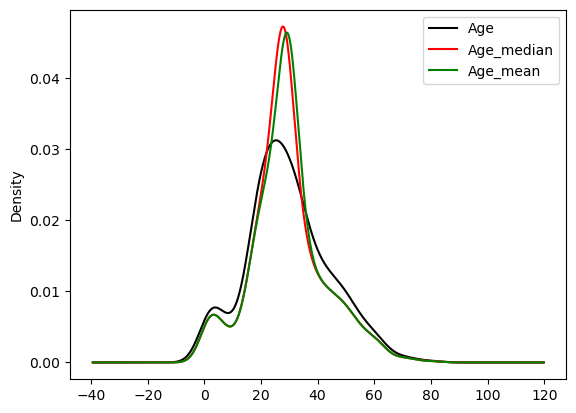

In [99]:
fig=plt.figure()
ax=fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax,color='black')

# variable imputed with the median
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best');

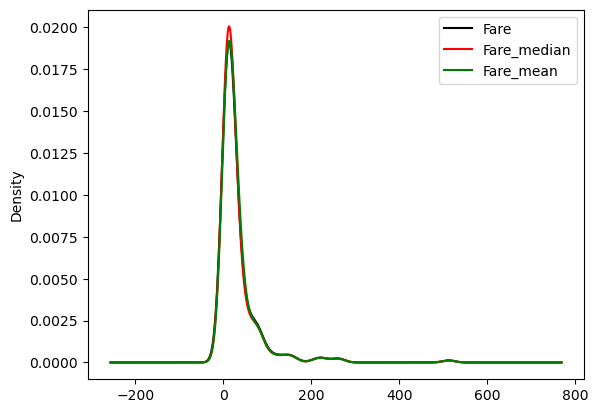

In [100]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax,color='black')

# variable imputed with the median
X_train['Fare_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best');

In [101]:
X_train.cov()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,71.193767,70.082085
Fare,75.481375,2761.031435,18.599163,60.224654,63.938058,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-5.616299,-5.587710,17.657433,17.672035
Age_mean,210.251707,60.224654,-5.616299,168.851934,168.851934,57.175304,56.282518
Age_median,210.251707,63.938058,-5.587710,168.851934,169.207310,60.700688,59.728510
Fare_mean,71.193767,2761.031435,17.657433,57.175304,60.700688,2621.232375,2621.232375
Fare_median,70.082085,2761.031435,17.672035,56.282518,59.728510,2621.232375,2637.012482


In [102]:
X_train.corr()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.088944,0.087232
Fare,0.091482,1.000000,0.207193,0.088151,0.093496,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.256883,-0.255307,0.204981,0.204536
Age_mean,1.000000,0.088151,-0.256883,1.000000,0.998949,0.085941,0.084346
Age_median,1.000000,0.093496,-0.255307,0.998949,1.000000,0.091145,0.089416
Fare_mean,0.088944,1.000000,0.204981,0.085941,0.091145,1.000000,0.997003
Fare_median,0.087232,1.000000,0.204536,0.084346,0.089416,0.997003,1.000000


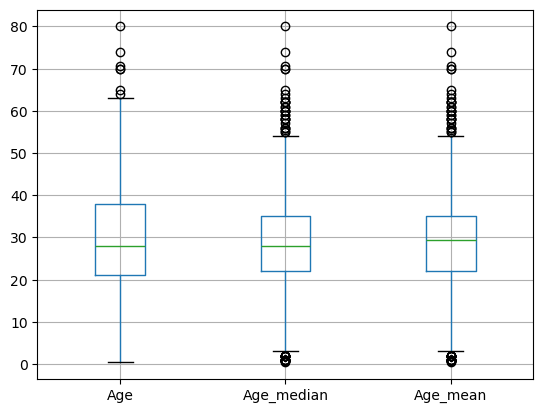

In [103]:
X_train[['Age', 'Age_median', 'Age_mean']].boxplot();

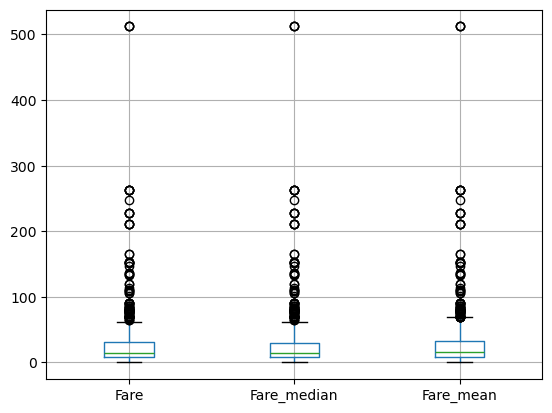

In [104]:
X_train[['Fare', 'Fare_median', 'Fare_mean']].boxplot();

## **Using Sklearn**

In [105]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [106]:
imputer1=SimpleImputer(strategy='mean')
imputer2=SimpleImputer(strategy='median')

In [107]:
trf=ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare']),
],remainder='passthrough')

In [108]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(), ['Age']),
                                ('imputer2', SimpleImputer(strategy='median'),
                                 ['Fare'])])

In [109]:
trf.named_transformers_['imputer1'].statistics_

array([29.78590426])

In [110]:
trf.named_transformers_['imputer2'].statistics_

array([14.4583])

In [111]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [117]:
new_df = pd.DataFrame(X_train)
new_df.columns=['Age','Fare','Family']
new_df

,Age,Fare,Family
0,40.000000,27.7208,0.0
1,4.000000,16.7000,2.0
2,47.000000,9.0000,0.0
3,9.000000,31.3875,6.0
4,20.000000,9.8458,0.0
...,...,...,...
707,30.000000,8.6625,0.0
708,29.785904,8.7125,0.0
709,71.000000,49.5042,0.0
710,29.785904,221.7792,0.0
